# An Initial Exploration of LIV + UV KASH cells image analysis

## Data Loading and Preprocessing

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import scipy.stats as stats
from scipy.stats import mannwhitneyu
from itertools import combinations
from statannotations.Annotator import Annotator

In [32]:
file_path = r"D:\BioLab\Current_experiments\Anamaria_3d_experiment\13.09.2023_analysis_data\cell_stat_verified_0_185.csv"
initial_df = pd.read_csv(file_path)
initial_df = initial_df.dropna(how='all')
initial_df

,Image_name,Img_num,Cell_num,"Nucleus_volume, cubic_micrometre","Nucleus_length, micrometre","Nucleus_width, micrometre","Nucleus_high, micrometre",Cy5-T1 av_signal_in_nuc_area_3D,Cy5-T1 has ring,Cy5-T1 ring intensity coef,AF594-T2 av_signal_in_nuc_area_3D,AF594-T2 has ring,AF594-T2 ring intensity coef,AF488-T3 av_signal_in_nuc_area_3D,AF488-T3 has ring,AF488-T3 ring intensity coef
1,23-5-19 Kash -UV +LIV 0hr-01.czi,0.0,2.0,1350.015015,19.221432,22.538405,6.67,5794.978028,False,0.308055,149.956310,False,0.727957,252.699393,False,0.495211
3,23-5-19 Kash -UV +LIV 0hr-01.czi,0.0,3.0,1200.007431,20.412141,20.667292,6.21,5979.380539,False,0.257681,160.995917,False,0.685988,267.338924,False,0.496859
5,23-5-19 Kash -UV +LIV 0hr-01.czi,0.0,4.0,1724.815610,22.028102,24.239417,6.67,6190.649713,False,0.194155,156.400194,False,0.679126,294.071809,False,0.413096
7,23-5-19 Kash -UV +LIV 0hr-01.czi,0.0,5.0,1642.387845,23.559012,25.260024,6.67,5687.317662,False,0.279658,165.852423,False,0.776251,291.047835,False,0.713376
9,23-5-19 Kash -UV +LIV 0hr-02.czi,1.0,0.0,1012.737320,19.306483,22.623456,4.83,7346.798319,False,0.423900,183.742148,False,0.851247,409.118310,False,0.601088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781,23-5-19 Kash+doxy 12J -LIV PFA-Triton 48hr-05.czi,185.0,1.0,387.257762,12.842638,32.659425,4.14,2025.239333,False,0.309760,221.535771,False,0.737609,2568.726308,False,0.281261
1783,23-5-19 Kash+doxy 12J -LIV PFA-Triton 48hr-05.czi,185.0,2.0,745.307939,21.347697,35.295993,3.68,2381.729429,False,0.135390,247.366577,False,0.756745,1644.706516,False,0.166449
1785,23-5-19 Kash+doxy 12J -LIV PFA-Triton 48hr-05.czi,185.0,3.0,410.168135,21.602849,33.850133,2.76,1583.480828,False,0.183329,281.035687,False,0.597232,1858.514348,False,0.148566
1787,23-5-19 Kash+doxy 12J -LIV PFA-Triton 48hr-05.czi,185.0,4.0,441.702445,26.025479,33.935184,2.53,1525.380570,False,0.338432,202.769873,False,0.704978,1826.428664,False,0.213817


In [33]:
def extract_info(image_name):
    date_pattern = re.compile(r'\d+-\d+-\d+')
    date = date_pattern.search(image_name).group(0)

    doxy = "+doxy" if "+doxy" in image_name else "-doxy"

    liv = "+LIV" if "+LIV" in image_name else "-LIV"

    uv = "UV" if "12J" in image_name else "Control"

    time_pattern = re.compile(r'0hr|24hr|48hr')
    time = time_pattern.search(image_name).group(0)

    return pd.Series([date, doxy, liv, uv, time], index=['Date', 'Doxy', 'LIV', 'UV', 'Time'])



In [34]:
# Extract the information into temporary DataFrame
temp_df = initial_df['Image_name'].apply(extract_info)

# Find the index of the "Image_name" column
idx = initial_df.columns.get_loc('Image_name') + 1

# Insert the new columns
for col in reversed(temp_df.columns):
    initial_df.insert(loc=idx, column=col, value=temp_df[col])


In [36]:
initial_df

,Image_name,Date,Doxy,LIV,UV,Time,Img_num,Cell_num,"Nucleus_volume, cubic_micrometre","Nucleus_length, micrometre",...,"Nucleus_high, micrometre",Cy5-T1 av_signal_in_nuc_area_3D,Cy5-T1 has ring,Cy5-T1 ring intensity coef,AF594-T2 av_signal_in_nuc_area_3D,AF594-T2 has ring,AF594-T2 ring intensity coef,AF488-T3 av_signal_in_nuc_area_3D,AF488-T3 has ring,AF488-T3 ring intensity coef
1,23-5-19 Kash -UV +LIV 0hr-01.czi,23-5-19,-doxy,+LIV,Control,0hr,0.0,2.0,1350.015015,19.221432,...,6.67,5794.978028,False,0.308055,149.956310,False,0.727957,252.699393,False,0.495211
3,23-5-19 Kash -UV +LIV 0hr-01.czi,23-5-19,-doxy,+LIV,Control,0hr,0.0,3.0,1200.007431,20.412141,...,6.21,5979.380539,False,0.257681,160.995917,False,0.685988,267.338924,False,0.496859
5,23-5-19 Kash -UV +LIV 0hr-01.czi,23-5-19,-doxy,+LIV,Control,0hr,0.0,4.0,1724.815610,22.028102,...,6.67,6190.649713,False,0.194155,156.400194,False,0.679126,294.071809,False,0.413096
7,23-5-19 Kash -UV +LIV 0hr-01.czi,23-5-19,-doxy,+LIV,Control,0hr,0.0,5.0,1642.387845,23.559012,...,6.67,5687.317662,False,0.279658,165.852423,False,0.776251,291.047835,False,0.713376
9,23-5-19 Kash -UV +LIV 0hr-02.czi,23-5-19,-doxy,+LIV,Control,0hr,1.0,0.0,1012.737320,19.306483,...,4.83,7346.798319,False,0.423900,183.742148,False,0.851247,409.118310,False,0.601088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781,23-5-19 Kash+doxy 12J -LIV PFA-Triton 48hr-05.czi,23-5-19,+doxy,-LIV,UV,48hr,185.0,1.0,387.257762,12.842638,...,4.14,2025.239333,False,0.309760,221.535771,False,0.737609,2568.726308,False,0.281261
1783,23-5-19 Kash+doxy 12J -LIV PFA-Triton 48hr-05.czi,23-5-19,+doxy,-LIV,UV,48hr,185.0,2.0,745.307939,21.347697,...,3.68,2381.729429,False,0.135390,247.366577,False,0.756745,1644.706516,False,0.166449
1785,23-5-19 Kash+doxy 12J -LIV PFA-Triton 48hr-05.czi,23-5-19,+doxy,-LIV,UV,48hr,185.0,3.0,410.168135,21.602849,...,2.76,1583.480828,False,0.183329,281.035687,False,0.597232,1858.514348,False,0.148566
1787,23-5-19 Kash+doxy 12J -LIV PFA-Triton 48hr-05.czi,23-5-19,+doxy,-LIV,UV,48hr,185.0,4.0,441.702445,26.025479,...,2.53,1525.380570,False,0.338432,202.769873,False,0.704978,1826.428664,False,0.213817


In [37]:
initial_df.columns

Index(['Image_name', 'Date', 'Doxy', 'LIV', 'UV', 'Time', 'Img_num',
       'Cell_num', 'Nucleus_volume, cubic_micrometre',
       'Nucleus_length, micrometre', 'Nucleus_width, micrometre',
       'Nucleus_high, micrometre', 'Cy5-T1 av_signal_in_nuc_area_3D',
       'Cy5-T1 has ring', 'Cy5-T1 ring intensity coef',
       'AF594-T2 av_signal_in_nuc_area_3D', 'AF594-T2 has ring',
       'AF594-T2 ring intensity coef', 'AF488-T3 av_signal_in_nuc_area_3D',
       'AF488-T3 has ring', 'AF488-T3 ring intensity coef'],
      dtype='object')

In [39]:
filtered_df = initial_df[['Doxy', 'LIV', 'UV', 'Time', 'Nucleus_volume, cubic_micrometre',
       'Nucleus_length, micrometre', 'Nucleus_width, micrometre',
       'Nucleus_high, micrometre', 'AF594-T2 av_signal_in_nuc_area_3D', 'AF594-T2 has ring',
       'AF594-T2 ring intensity coef', 'AF488-T3 av_signal_in_nuc_area_3D']]

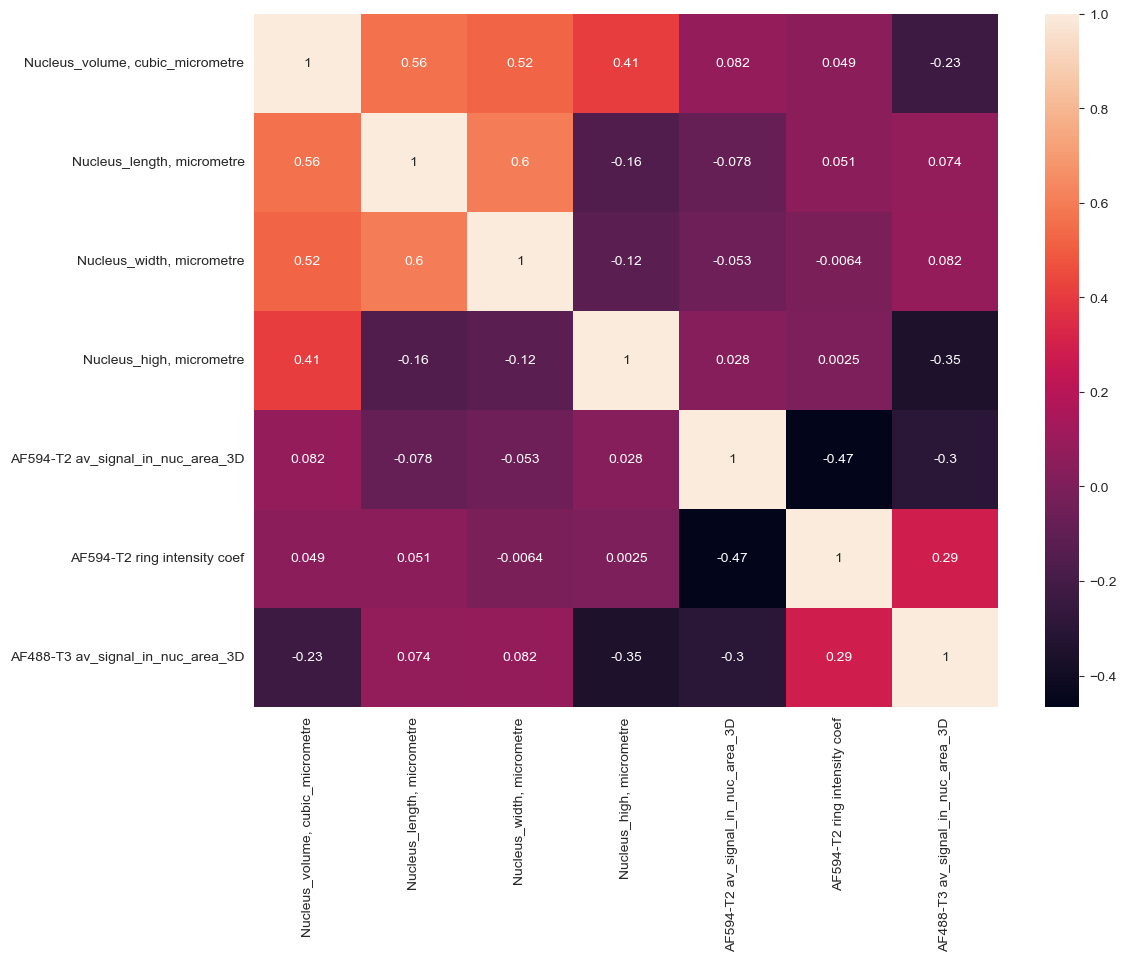

In [40]:
correlation_matrix = filtered_df.corr()
plt.figure(figsize=(12, 9)) # Set the size to 15 inches wide and 10 inches tall
sns.heatmap(correlation_matrix, annot=True)
plt.show()

C:\Users\nnina\AppData\Local\Temp\ipykernel_31304\2363245886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Group'] = filtered_df['Doxy'] + ', ' + filtered_df['LIV'] + ', ' + filtered_df['UV'] + ', '+ ', ' + filtered_df['Time']


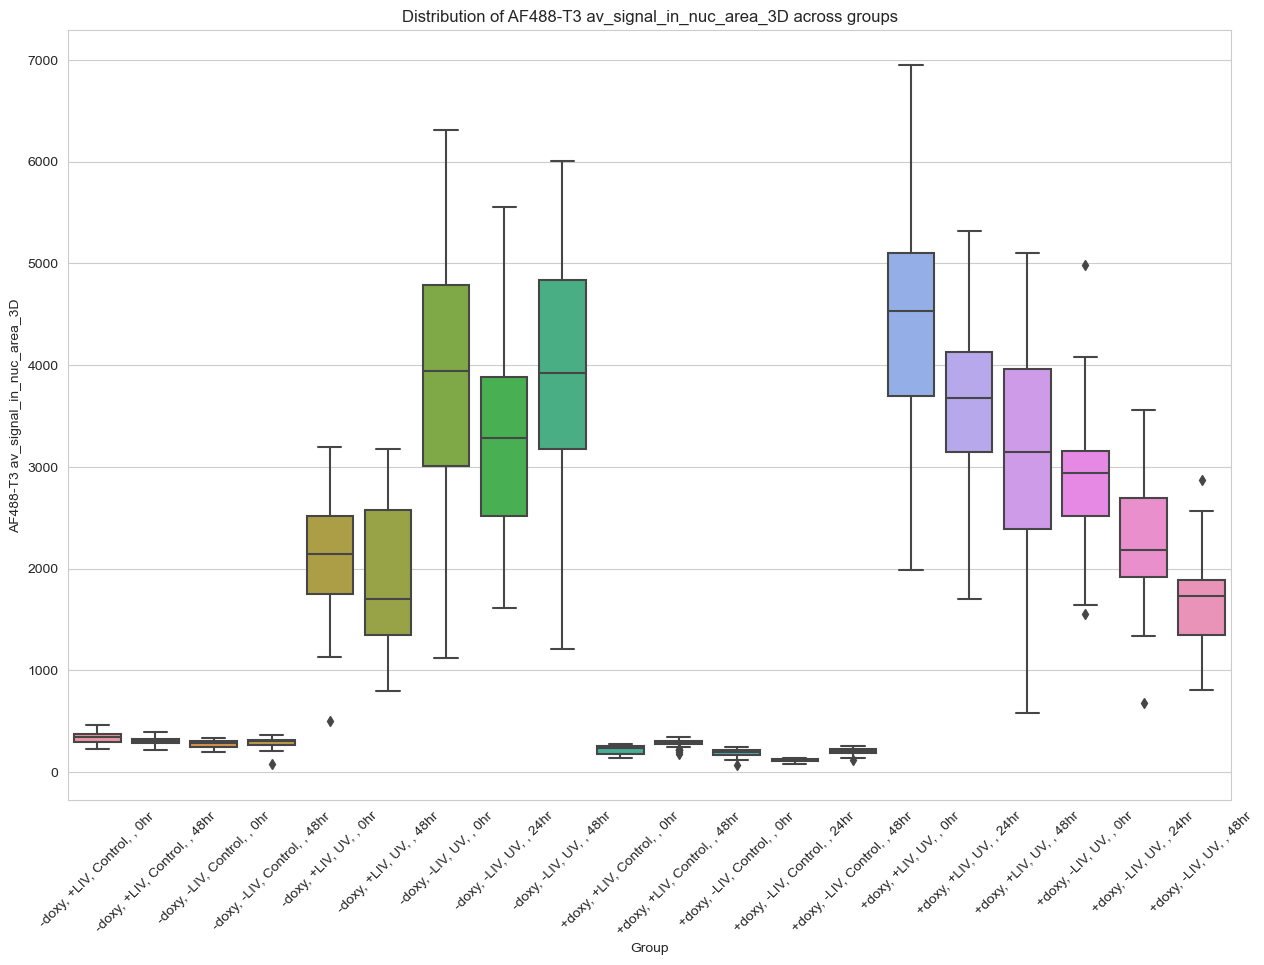

In [42]:
filtered_df['Group'] = filtered_df['Doxy'] + ', ' + filtered_df['LIV'] + ', ' + filtered_df['UV'] + ', '+ ', ' + filtered_df['Time']
plt.figure(figsize=(15, 10))
sns.boxplot(x='Group', y='AF488-T3 av_signal_in_nuc_area_3D', data=filtered_df)
plt.title('Distribution of AF488-T3 av_signal_in_nuc_area_3D across groups')
plt.xticks(rotation=45) # Rotate x-axis labels for better visibility
plt.show()

In [43]:
filtered_df['AF488-T3 Volume_corrected_signal_in_nuc_area_3D'] = filtered_df['AF488-T3 av_signal_in_nuc_area_3D'] * filtered_df['Nucleus_volume, cubic_micrometre']

C:\Users\nnina\AppData\Local\Temp\ipykernel_31304\673853883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['AF488-T3 Volume_corrected_signal_in_nuc_area_3D'] = filtered_df['AF488-T3 av_signal_in_nuc_area_3D'] * filtered_df['Nucleus_volume, cubic_micrometre']


C:\Users\nnina\AppData\Local\Temp\ipykernel_31304\3936366284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Group'] = filtered_df['Doxy'] + ', ' + filtered_df['LIV'] + ', ' + filtered_df['UV'] + ', '+ ', ' + filtered_df['Time']


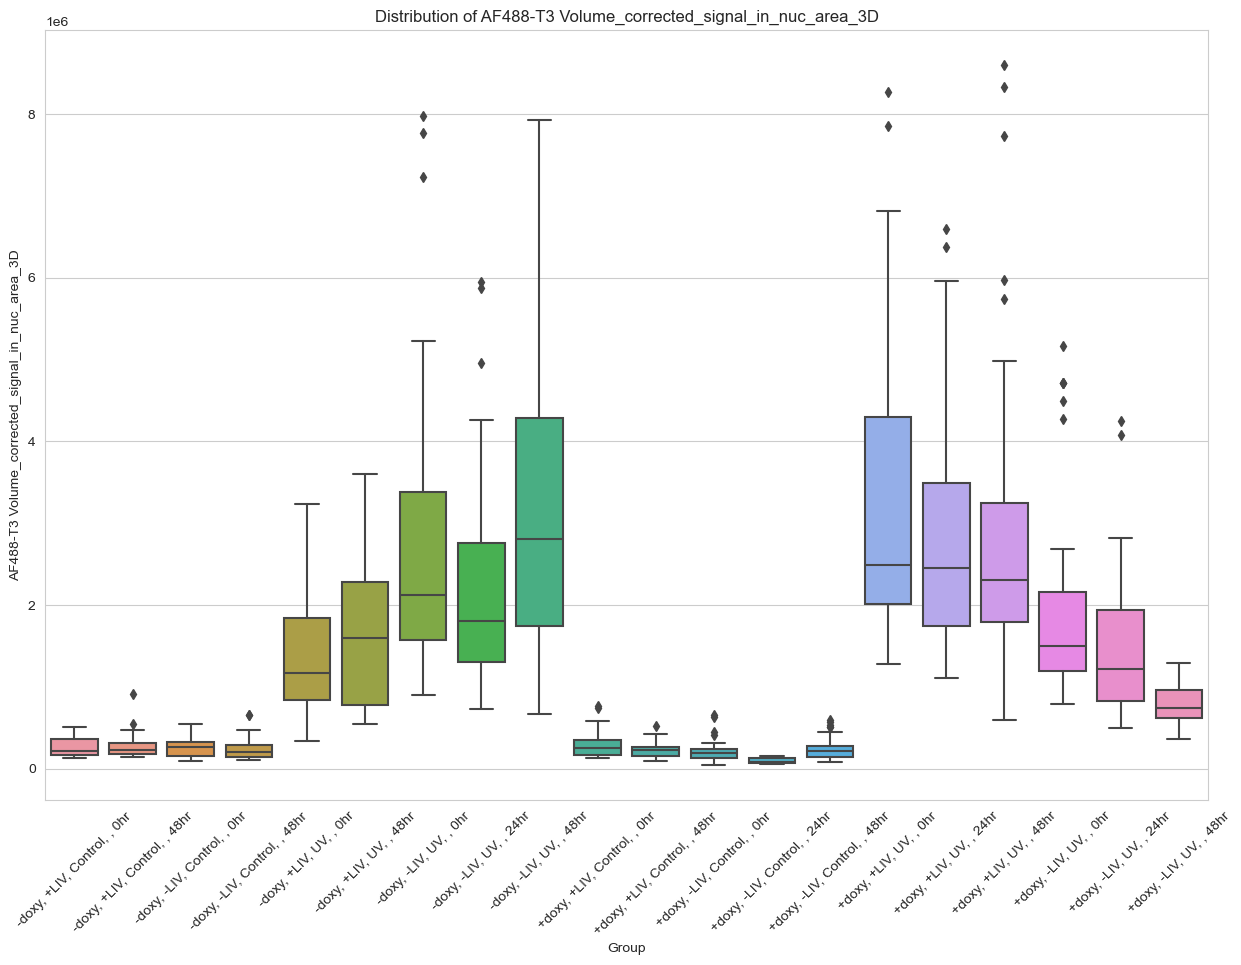

In [45]:
filtered_df['Group'] = filtered_df['Doxy'] + ', ' + filtered_df['LIV'] + ', ' + filtered_df['UV'] + ', '+ ', ' + filtered_df['Time']
plt.figure(figsize=(15, 10))
sns.boxplot(x='Group', y='AF488-T3 Volume_corrected_signal_in_nuc_area_3D', data=filtered_df)
plt.title('Distribution of AF488-T3 Volume_corrected_signal_in_nuc_area_3D')
plt.xticks(rotation=45) # Rotate x-axis labels for better visibility
plt.show()